In [109]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [123]:
img = cv2.cvtColor(cv2.imread('region_filling.tif'), cv2.COLOR_BGR2GRAY)


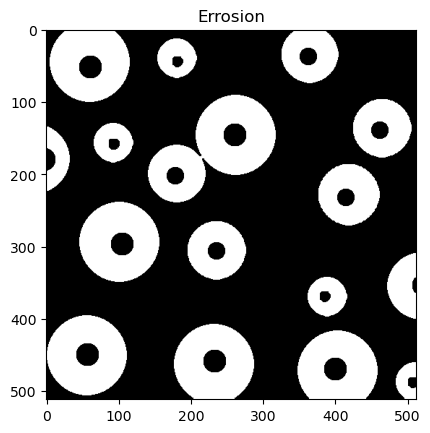

In [124]:
# errision of an image 

def errosion(img):

    st_elm = np.ones((3, 3))
    st_elm = st_elm * 255

    center = st_elm.shape[0] // 2

    errosion_img = img.copy()

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            fits = True
            for dx in range(-center, center + 1):
                for dy in range(-center, center + 1):
                    st_x = dx + center
                    st_y = dy + center

                    img_x = dx + i
                    img_y = dy + j

                    if 0 <= img_x < img.shape[0] and 0 <= img_y < img.shape[1]:
                        if st_elm[st_x, st_y] == 255 and img[img_x, img_y] != 255:
                            fits = False
            
            errosion_img[i, j] = 255 if fits else 0
    
    return errosion_img

err = errosion(img)
plt.title('Errosion')
plt.imshow(err, cmap='gray')

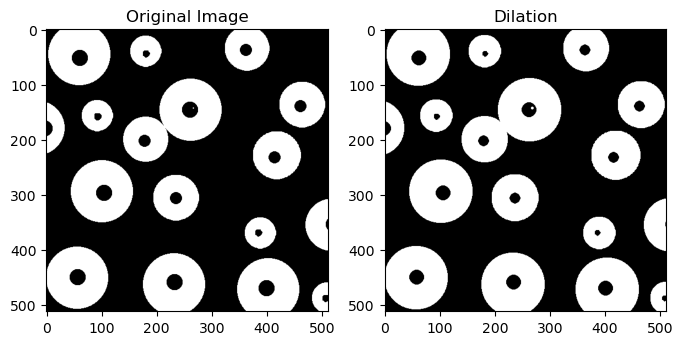

In [125]:
# Dilation  of image

def dilation(img):

    st_elm = np.ones((3, 3))
    st_elm = st_elm * 255

    center = st_elm.shape[0] // 2

    dilation_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hits = False
            for dx in range(-center, center + 1):
                for dy in range(-center, center + 1):
                    st_x = dx + center
                    st_y = dy + center

                    img_x = dx + i
                    img_y = dy + j

                    if 0 <= img_x < img.shape[0] and 0 <= img_y < img.shape[1]:
                        if st_elm[st_x, st_y] == 255 and img[img_x, img_y] == 255:
                            hits = True
                            break
                if hits:
                    break
            dilation_img[i, j] = 255 if hits else 0
    
    return dilation_img

dil = dilation(img)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Dilation')
plt.imshow(dil, cmap='gray')

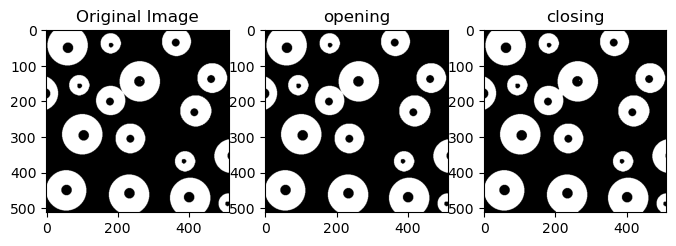

In [126]:
opening = dilation(errosion(img))
closing = errosion(dilation(img))
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('opening')
plt.imshow(opening, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('closing')
plt.imshow(closing, cmap='gray')

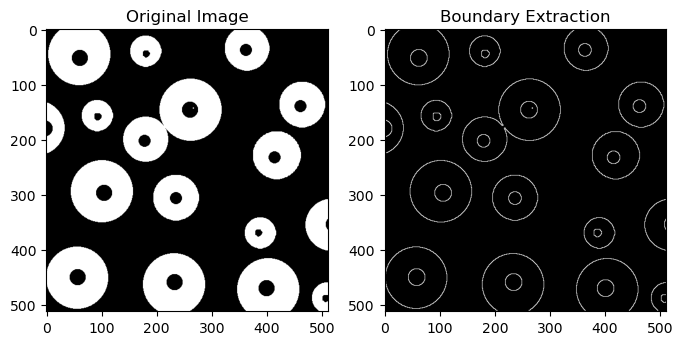

In [128]:
# boundary extraction

img = cv2.cvtColor(cv2.imread('region_filling.tif'), cv2.COLOR_BGR2GRAY)
boundary = img - errosion(img)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Boundary Extraction')
plt.imshow(boundary, cmap='gray')

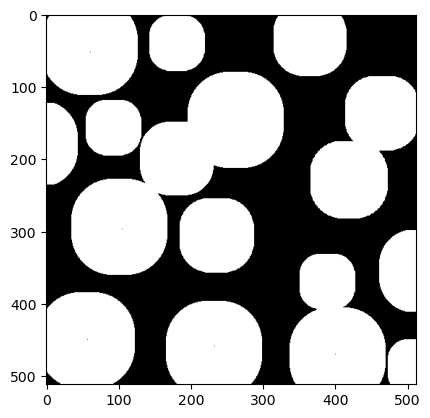

In [129]:
# filling

img = cv2.cvtColor(cv2.imread('region_filling.tif'), cv2.COLOR_BGR2GRAY)
complementA  = 255 - img

X = img.copy()
conter = 0
while True:
    xN = dilation(X) & complementA
    if np.array_equal(xN, X):
        break

    X = xN
    conter += 1
    if conter == 10:
        break


fill = X | img

plt.imshow(fill, cmap='gray')


     
